In [6]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [7]:
vid = cv2.VideoCapture("Freewa.mp4")
frameNr = 0

while(True):
    success, frame = vid.read()
    if success:
        cv2.imwrite(f"frames/frame_{frameNr}.jpg",frame)
    else:
        break
    frameNr = frameNr + 1
vid.release()

In [8]:
# get file names of the frames
col_frames = os.listdir('frames/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))


# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    col_images.append(img)

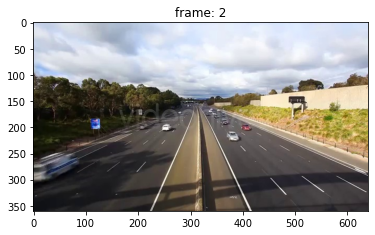

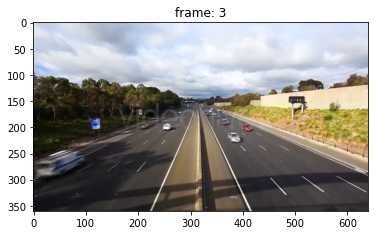

In [9]:
# plot 13th frame
i = 2

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    #plt.imshow(col_images[frame])
    plt.title("frame: "+str(frame))
    plt.show()

In [52]:
'''
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()
'''

"\n# convert the frames to grayscale\ngrayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)\ngrayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)\n\n# plot the image after frame differencing\nplt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')\nplt.show()\n"

In [53]:
'''
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()
'''

"\ndiff_image = cv2.absdiff(grayB, grayA)\n\n# perform image thresholding\nret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)\n\n# plot image after thresholding\nplt.imshow(thresh, cmap = 'gray')\nplt.show()\n"

In [54]:
'''
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()
'''

"\n# apply image dilation\nkernel = np.ones((3,3),np.uint8)\ndilated = cv2.dilate(thresh,kernel,iterations = 1)\n\n# plot dilated image\nplt.imshow(dilated, cmap = 'gray')\nplt.show()\n"

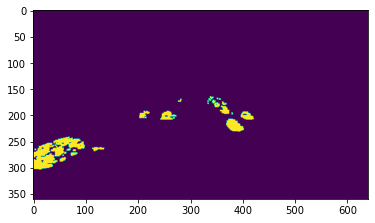

In [47]:
'''
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0))
plt.show()
'''

In [55]:
'''
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)
dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()
'''

'\n# find contours\ncontours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)\nvalid_cntrs = []\n\nfor i,cntr in enumerate(contours):\n    x,y,w,h = cv2.boundingRect(cntr)\n    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):\n        valid_cntrs.append(cntr)\n\n# count of discovered contours        \nlen(valid_cntrs)\n'

In [51]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "contour_frames_3/"

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)

In [16]:
def get_speed(new, old, frame_time):
    dist = new-old
    return dist/frame_time

In [17]:
def main(video):
    framecount = 0
    vid =  cv2.VideoCapture(video)
    background2 = cv2.createBackgroundSubtractorMOG2(history=200)
    kernel = np.array(([0,1,0],[1,1,1],[0,1,0]),dtype = np.uint8)
    kernel2 = np.ones((10,10),np.uint8)
    kernel3 = np.ones((8,8),np.uint8)
    new = 0
    old = 0
    count = 0
    cv2.namedWindow("mask")
    cv2.moveWindow("mask",0,0)
    cv2.namedWindow("foreground")
    cv2.moveWindow("foreground", 1000,0)
    cv2.namedWindow("original")    
    while vid.isOpened():
        framecount = framecount + 1
        ret, frame = vid.read()
        if not ret:
            break
        imgray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        mask = background2.apply(frame,learningRate=.05)
        erode = cv2.erode(mask,kernel,iterations =1)
        dilate = cv2.dilate(erode,kernel2,iterations = 1)

        ret,thresh = cv2.threshold(dilate,127,255,0)
        contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

        if framecount>150:
            for i in contours:
                if cv2.contourArea(i) > 2000:
                    x,y,w,h = cv2.boundingRect(i)
                    if y+h/2>400:
                        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
                        new = new + y+h/2

            if new > old +400:
                count = count + 1
                print("_____________________________________")
                print("new", new, "old", old, "speed", get_speed(new,old, 25))
            number = str(count)
            cv2.putText(frame,number,(700,100),cv2.FONT_HERSHEY_SIMPLEX,4,(0,0,255),10)
            old = new
            new = 0

            
            cv2.imshow('mask', mask)
            cv2.imshow('foreground',dilate)
            cv2.imshow('original',frame)
        #time.sleep(.025)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    vid.release()

    cv2.destroyAllWindows()

In [20]:
main("highway.mp4")

_____________________________________
new 424.0 old 0 speed 4.0
_____________________________________
new 428.5 old 0 speed 8.0
_____________________________________
new 447.5 old 0 speed 12.0
_____________________________________
new 446.0 old 0 speed 16.0
_____________________________________
new 427.5 old 0 speed 20.0
_____________________________________
new 440.0 old 0 speed 24.0
_____________________________________
new 434.0 old 0 speed 28.0
_____________________________________
new 414.5 old 0 speed 32.0
_____________________________________
new 435.5 old 0 speed 36.0
_____________________________________
new 854.0 old 0 speed 40.0
_____________________________________
new 418.5 old 0 speed 44.0
_____________________________________
new 448.5 old 0 speed 48.0
_____________________________________
new 401.0 old 0 speed 52.0
_____________________________________
new 420.0 old 0 speed 56.0
_____________________________________
new 854.5 old 0 speed 60.0
___________________________

In [15]:
# loop over the contours individually
for c in cnts:
	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue
	# compute the rotated bounding box of the contour
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	# compute the center of the bounding box
	cX = np.average(box[:, 0])
	cY = np.average(box[:, 1])
    # if this is the first contour we are examining (i.e.,
	# the left-most contour), we presume this is the
	# reference object
	if refObj is None:
		# unpack the ordered bounding box, then compute the
		# midpoint between the top-left and top-right points,
		# followed by the midpoint between the top-right and
		# bottom-right
		(tl, tr, br, bl) = box
		(tlblX, tlblY) = midpoint(tl, bl)
		(trbrX, trbrY) = midpoint(tr, br)
		# compute the Euclidean distance between the midpoints,
		# then construct the reference object
		D = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
		refObj = (box, (cX, cY), D / 0.955)
		continue
    # draw the contours on the image
	orig = image.copy()
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
	cv2.drawContours(orig, [refObj[0].astype("int")], -1, (0, 255, 0), 2)
	# stack the reference coordinates and the object coordinates
	# to include the object center
	refCoords = np.vstack([refObj[0], refObj[1]])
	objCoords = np.vstack([box, (cX, cY)])
	# loop over the original points
	for ((xA, yA), (xB, yB), color) in zip(refCoords, objCoords, colors):
		# draw circles corresponding to the current points and
		# connect them with a line
		cv2.circle(orig, (int(xA), int(yA)), 5, color, -1)
		cv2.circle(orig, (int(xB), int(yB)), 5, color, -1)
		cv2.line(orig, (int(xA), int(yA)), (int(xB), int(yB)),
			color, 2)
		# compute the Euclidean distance between the coordinates,
		# and then convert the distance in pixels to distance in
		# units
		D = dist.euclidean((xA, yA), (xB, yB)) / refObj[2]
		(mX, mY) = midpoint((xA, yA), (xB, yB))
		cv2.putText(orig, "{:.1f}in".format(D), (int(mX), int(mY - 10)),
			cv2.FONT_HERSHEY_SIMPLEX, 0.55, color, 2)
		# show the output image
		cv2.imshow("Image", orig)
		cv2.waitKey(0)

KeyboardInterrupt: 

SyntaxError: 'continue' not properly in loop (<ipython-input-12-a220e47012ac>, line 16)